In [2]:
import pandas as pd
import numpy as np

from pipeline import vector_comparison

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, jaccard_score, accuracy_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('data/training.csv', index_col = 0)
df = df.iloc[:10000] #need to limit rows while running on local machine.


testing = pd.read_csv('data/testing.csv', index_col = 0)

In [13]:
model6.shape

(2500, 4)

In [4]:
model6 = pd.read_csv('data/model6.csv', index_col = 0)

model6.loc[model6.results < 0] = 0

final_no_out = model6.loc[model6['results'] < 0.99]
final_no_out = final_no_out.loc[final_no_out['results'] > 0.01]


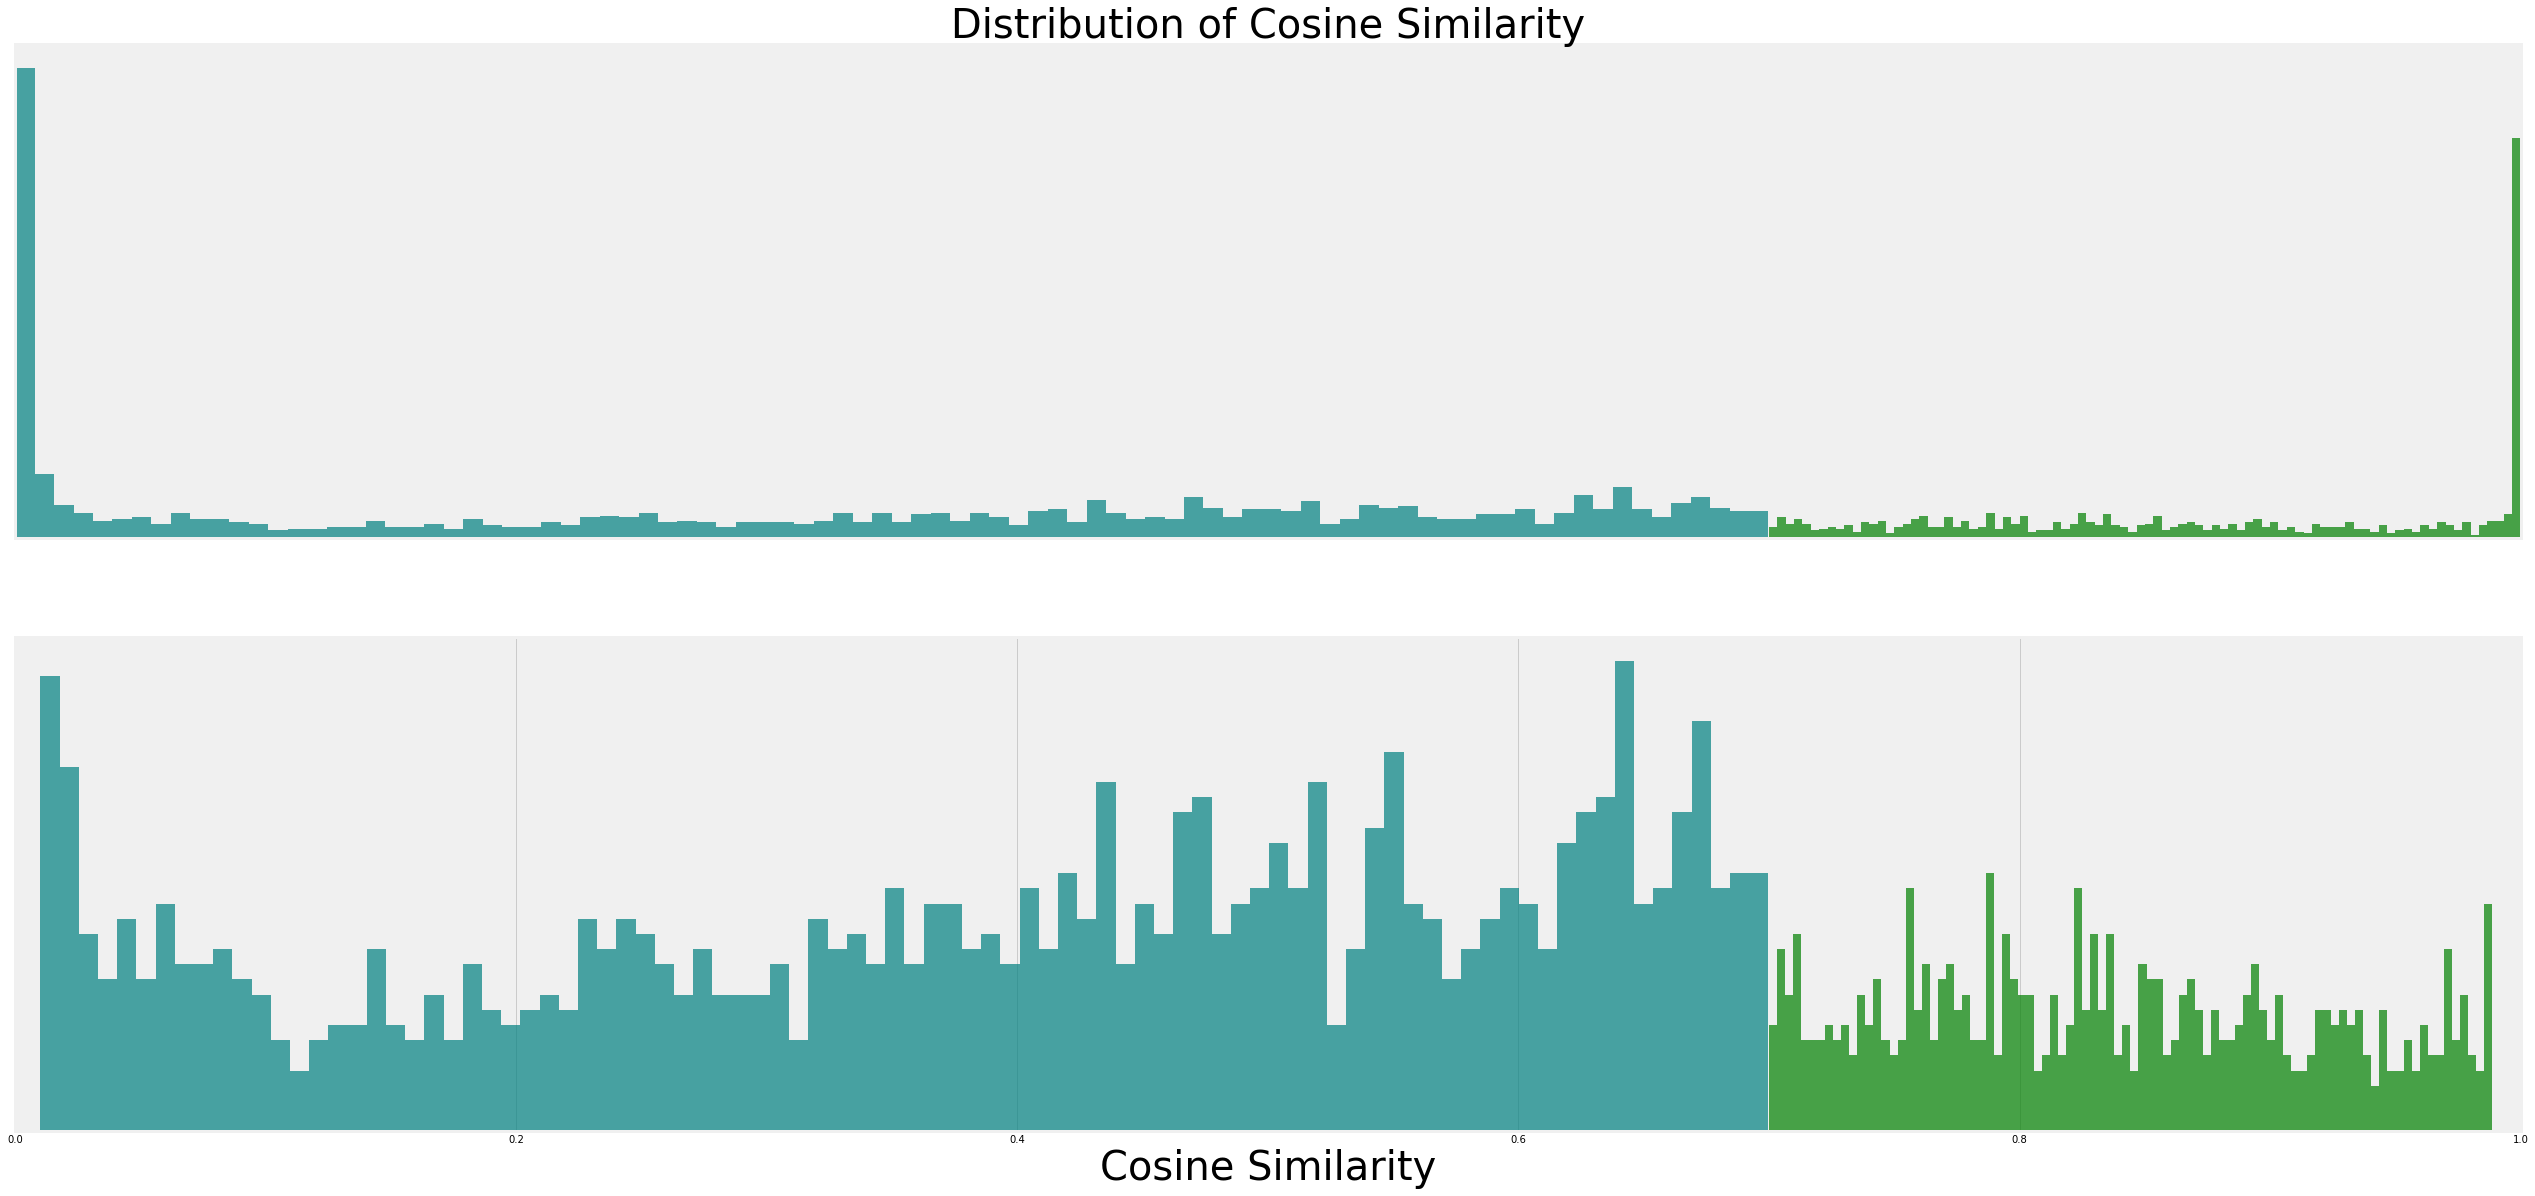

In [9]:
fig, axs = plt.subplots(2,1, figsize = (40,20),sharex=True)
axs[0].set_title("Distribution of Cosine Similarity", fontsize = 40)
axs[0].hist(model6.loc[model6['results'] < 0.700]['results'],
            bins = 90, color='teal', alpha = 0.7)
axs[0].hist(model6.loc[model6['results'] > 0.700]['results'],
            bins = 90, color='green', alpha = 0.7)
axs[1].hist(final_no_out.loc[final_no_out['results'] < 0.700]['results'],
            bins = 90, color='teal', alpha = 0.7)
axs[1].hist(final_no_out.loc[final_no_out['results'] > 0.700]['results'],
            bins = 90, color='green', alpha = 0.7)

axs[0].get_yaxis().set_visible(False)
axs[1].get_yaxis().set_visible(False)
axs[0].get_xaxis().set_visible(False)
#axs[1].get_xaxis().set_visible(False)
axs[1].set_xlabel("Cosine Similarity", fontsize = 40)

axs[0].set_xlim(model6.loc[model6['results'] < 0.500]['results'].min(),1)

plt.savefig('SRC/CosineSimilarity.png', transparent=True)


In [10]:
model6.head()

,question1,question2,is_duplicate,results
id,,,,
667,What is fermentation? What are some products o...,What are some fermented products?,0,1.000000
56745,What is it like to be newly wed?,What do newly weds do on their honeymoon?,0,0.295603
88223,What are some of the best IAS coaching institu...,What are some of the best IAS coaching institu...,0,0.730787
81125,How can you stay motivated through whatever?,How do I stay motivated and achieve my goals w...,0,0.834886
218129,0,0,0,0.000000


In [12]:
  #assumes that return_df_w_results has been run and self.final exsits        
threshold = 0.633
correct = 0
true_pos = 0
true_neg = 0
false_pos = 0
false_neg = 0

for idx in model6.index:
    guess = (model6['results'].loc[idx] > threshold).astype(int)
    actual =  model6['is_duplicate'].loc[idx]

    if guess == actual:
        correct += 1
        if guess == 1:
            true_pos += 1
        if guess == 0:
            true_neg += 1
    elif guess == 1 and actual == 0:
        false_pos += 1
    else:
        false_neg += 1

#print(true_pos, " ", false_pos)
#print(false_neg," ", true_neg)

print("TP",true_pos, "FP",false_pos, "FN",false_neg, "TN",true_neg)
accuracy = (true_pos + true_neg) / model6.shape[0]
TPR = true_pos / (model6['is_duplicate'] == True).astype(int).sum()
FPR = true_neg / (model6['is_duplicate'] == False).astype(int).sum()
precision = true_pos / (true_pos +false_pos)


TP 645 FP 503 FN 282 TN 1070
